# Traffic Collisions Dataset

### Welcome to DS3's first datathon!

This is going to be a summary of the traffic collisions dataset, as well as an intro to Pandas, Matplotlib, and Sci-kit learn to give you some jumping off points of what you could do.

This data is from the city of San Diego's open data portal, https://data.sandiego.gov/.  This is real data relating to San Diego traffic and collisions that you will be able to work with.

Collisions: https://data.sandiego.gov/datasets/police-collisions/

Traffic Volumes: https://data.sandiego.gov/datasets/traffic-volumes/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Data

In [3]:
collisions = pd.read_csv("pd_collisions_datasd.csv")
counts = pd.read_csv("traffic_counts_datasd.csv")

In [4]:
collisions.head(3)

,report_id,date_time,police_beat,street_no,street_dir,street_name,street_type,cross_st_dir,cross_st_name,cross_st_type,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,170166,2017-01-01 00:01:00,124,8300,,CAM DEL ORO,,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
1,170101,2017-01-01 00:01:00,322,6400,,CRAWFORD,STREET,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
2,170218,2017-01-01 00:01:00,325,8100,,ROYAL GORGE,DRIVE,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR


In [5]:
counts.head(3)

,id,street_name,limits,all_count,northbound_count,southbound_count,eastbound_count,westbound_count,total_count,file_no,count_date
0,01AV018207,01 AV,A ST - ASH ST,,18010,NaN,NaN,NaN,18010,0182-07,2007-03-13 00:00:00
1,01AV015210,01 AV,A ST - ASH ST,,20060,NaN,NaN,NaN,20060,0152-10,2010-03-18 00:00:00
2,01AV018213,01 AV,A ST - ASH ST,,19597,NaN,NaN,NaN,19597,0182-13,2013-03-12 00:00:00


### What do the csvs include?

## Pandas Tutorial

Let's see how we can use Pandas to clean, filter, and manipulate our data so that you can learn how to use it if you don't already, and maybe get some ideas on what you could do.

Before we can work on anything else, let's have a look at what data are included.

#### Collisions

The collisions dataset comes with information about when the collision occurred, what police beat the collision occurred in, street number, name, and type, violation section, type, and charge description.

#### Volumes

The volumes dataset contains info on the street name, number of cars going north, south, east, and west, the total count, and when the count of cars occurred.

### Selecting data

In [8]:
collisions['street_name'].head()

0    CAM DEL ORO
1       CRAWFORD
2    ROYAL GORGE
3        VALERIO
4           11TH
Name: street_name, dtype: object

In [15]:
collisions[['report_id', 'street_name']].head()

,report_id,street_name
0,170166,CAM DEL ORO
1,170101,CRAWFORD
2,170218,ROYAL GORGE
3,170082,VALERIO
4,170097,11TH


In [7]:
collisions[collisions['injured'] > 1].head(3)

,report_id,date_time,police_beat,street_no,street_dir,street_name,street_type,cross_st_dir,cross_st_name,cross_st_type,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
25,170257,2017-01-01 18:07:00,611,3700,,SPORTS ARENA,BOULEVARD,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,4,0,NaN
27,170146,2017-01-01 19:45:00,822,5800,,EL CAJON,BOULEVARD,,,,21801A,VC,LEFT TURN YIELD UNTIL SAFE OR U-TURN,2,0,NaN
29,170122,2017-01-01 22:15:00,841,3400,,COLLEGE,AVENUE,,,,21804,VC,ENTERING HWY FROM PRIVATE ROAD OR DRIVEWAY,3,0,NaN


In [17]:
collisions[(collisions['injured'] > 1) & (collisions['injured'] < 4)].head(3)

,report_id,date_time,police_beat,street_no,street_dir,street_name,street_type,cross_st_dir,cross_st_name,cross_st_type,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
27,170146,2017-01-01 19:45:00,822,5800,,EL CAJON,BOULEVARD,,,,21801A,VC,LEFT TURN YIELD UNTIL SAFE OR U-TURN,2,0,NaN
29,170122,2017-01-01 22:15:00,841,3400,,COLLEGE,AVENUE,,,,21804,VC,ENTERING HWY FROM PRIVATE ROAD OR DRIVEWAY,3,0,NaN
38,170129,2017-01-02 14:10:00,722,1900,,PALM,AVENUE,,,,21703,VC,FOLLOWING TOO CLOSELY,3,0,NaN


You can use brackets and column names to filter out information you don't want to look at at the moment. Filtering data is done by creating a boolean array, which is what 'collisions['injured'] > 1' creates, and then putting that in the brackets for collisions.  

A boolean array is a list of true and falses that matches the number of rows in the dataset, so true would mean keep the row, false would mean ignore it.

In [20]:
(collisions['injured'] > 1).head()

0    False
1    False
2    False
3    False
4    False
Name: injured, dtype: bool

### Locating data: iloc vs loc

In [9]:
collisions.head(3)

,report_id,date_time,police_beat,street_no,street_dir,street_name,street_type,cross_st_dir,cross_st_name,cross_st_type,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,170166,2017-01-01 00:01:00,124,8300,,CAM DEL ORO,,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
1,170101,2017-01-01 00:01:00,322,6400,,CRAWFORD,STREET,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
2,170218,2017-01-01 00:01:00,325,8100,,ROYAL GORGE,DRIVE,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR


In [10]:
collisions.iloc[1]

report_id                                                       170101
date_time                                          2017-01-01 00:01:00
police_beat                                                        322
street_no                                                         6400
street_dir                                                            
street_name                                                   CRAWFORD
street_type                                                     STREET
cross_st_dir                                                          
cross_st_name                                                         
cross_st_type                                                         
violation_section                                             MISC-HAZ
violation_type                                                      VC
charge_desc          MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...
injured                                                              0
killed

In [11]:
collisions.loc[1]

report_id                                                       170101
date_time                                          2017-01-01 00:01:00
police_beat                                                        322
street_no                                                         6400
street_dir                                                            
street_name                                                   CRAWFORD
street_type                                                     STREET
cross_st_dir                                                          
cross_st_name                                                         
cross_st_type                                                         
violation_section                                             MISC-HAZ
violation_type                                                      VC
charge_desc          MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...
injured                                                              0
killed

iloc will pull information at the given index, numerically. loc will do the same, except it can pull information when the index is named as well, so you can pass a string.

You can also use iloc and loc to pull out multiple rows and columns.

In [12]:
collisions.iloc[1:3, 2:5]

,police_beat,street_no,street_dir
1,322,6400,
2,325,8100,


In [13]:
collisions.loc[1:3, "police_beat":"street_dir"]

,police_beat,street_no,street_dir
1,322,6400,
2,325,8100,
3,935,5500,


You can also use slicing to pull out information.  The first parameter is the rows you want to include, and the second parameter are the columns you want to include.

In [23]:
collisions.drop('police_beat', axis=1).head(3)

,report_id,date_time,street_no,street_dir,street_name,street_type,cross_st_dir,cross_st_name,cross_st_type,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,170166,2017-01-01 00:01:00,8300,,CAM DEL ORO,,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
1,170101,2017-01-01 00:01:00,6400,,CRAWFORD,STREET,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
2,170218,2017-01-01 00:01:00,8100,,ROYAL GORGE,DRIVE,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR


In [26]:
collisions['street_type'].unique()

array([' ', 'STREET', 'DRIVE', 'TRAIL', 'AVENUE', 'PLACE', 'COURT',
       'ROAD', 'BOULEVARD', 'PARKWAY', 'WAY', 'COVE', 'CIRCLE', 'LANE',
       'HIGHWAY', 'TERRACE', 'PLAZA', 'MALL', 'ROW', 'POINT', 'WALK',
       'PASEO', 'SQUARE', 'RAMP', 'DRIVEWAY', 'KNOLLS', nan, 'LIGHTS'],
      dtype=object)

In [28]:
collisions.groupby('street_type').mean().head()

,police_beat,street_no,injured,killed
street_type,,,,
,490.713604,5227.621321,0.640414,0.007955
AVENUE,519.518253,3354.103436,0.595025,0.004474
BOULEVARD,513.738517,4440.148282,0.732369,0.007233
CIRCLE,578.274725,2264.835165,0.428571,0.000000
COURT,415.598802,6344.311377,0.239521,0.000000


In [32]:
grouped = collisions.groupby('violation_type').sum()
grouped

,police_beat,street_no,injured,killed
violation_type,,,,
CO,2107,16000,5,0
HS,468,9900,1,0
MC,7103,26700,10,0
PC,1304,12300,1,0
VC,10758172,96644170,13580,114
ZZ,5504,68500,4,1


In [31]:
grouped.reset_index()

,violation_type,police_beat,street_no,injured,killed
0,CO,2107,16000,5,0
1,HS,468,9900,1,0
2,MC,7103,26700,10,0
3,PC,1304,12300,1,0
4,VC,10758172,96644170,13580,114
5,ZZ,5504,68500,4,1


In [38]:
def edit_row(row):
    if row['killed'] > 0:
        return 'fatal'
    return 'not fatal'

collisions['fatal'] = collisions.apply(edit_row, axis=1)
collisions.head()

,report_id,date_time,police_beat,street_no,street_dir,street_name,street_type,cross_st_dir,cross_st_name,cross_st_type,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl,fatal
0,170166,2017-01-01 00:01:00,124,8300,,CAM DEL ORO,,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR,not fatal
1,170101,2017-01-01 00:01:00,322,6400,,CRAWFORD,STREET,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR,not fatal
2,170218,2017-01-01 00:01:00,325,8100,,ROYAL GORGE,DRIVE,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR,not fatal
3,170082,2017-01-01 00:01:00,935,5500,,VALERIO,TRAIL,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR,not fatal
4,170097,2017-01-01 01:00:00,521,1000,,11TH,AVENUE,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR,not fatal


## Graphing

In [52]:
grouped = collisions.groupby('street_type').mean()
grouped

,police_beat,street_no,injured,killed
street_type,,,,
,490.713604,5227.621321,0.640414,0.007955
AVENUE,519.518253,3354.103436,0.595025,0.004474
BOULEVARD,513.738517,4440.148282,0.732369,0.007233
CIRCLE,578.274725,2264.835165,0.428571,0.000000
COURT,415.598802,6344.311377,0.239521,0.000000
COVE,591.333333,6300.000000,0.000000,0.000000
DRIVE,324.772895,5454.468242,0.536928,0.003693
DRIVEWAY,690.000000,5650.000000,0.500000,0.000000
HIGHWAY,585.242991,3235.514019,0.747664,0.000000


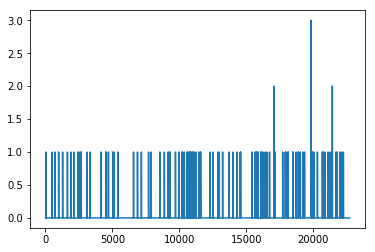